In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
loan= pd.read_csv('train_ctrUa4K.csv')

In [46]:
loan

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Yes,Y
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,Rural,1,0
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1,1
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1,1
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,Urban,0,1
5,LP001011,Male,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,1,1
6,LP001013,Male,Not Graduate,No,2333,1516.0,95.0,360.0,Urban,1,1
7,LP001014,Male,Graduate,No,3036,2504.0,158.0,360.0,Semiurban,1,0
8,LP001018,Male,Graduate,No,4006,1526.0,168.0,360.0,Urban,1,1
9,LP001020,Male,Graduate,No,12841,10968.0,349.0,360.0,Semiurban,1,0
10,LP001024,Male,Graduate,No,3200,700.0,70.0,360.0,Urban,1,1


In [4]:
import seaborn as sns

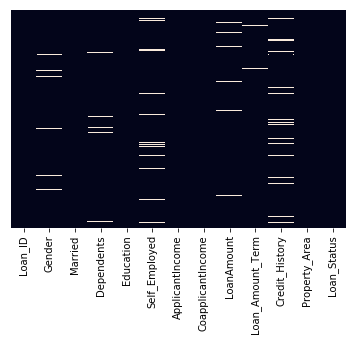

In [5]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [6]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
married=pd.get_dummies(loan['Married'],drop_first=True)

In [9]:
loan.drop(['Married'],axis=1,inplace=True)
loan=pd.concat([loan,married],axis=1)

In [10]:
loan.head(10)

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Yes
0,LP001002,Male,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,LP001011,Male,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1
6,LP001013,Male,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1
7,LP001014,Male,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1
8,LP001018,Male,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1
9,LP001020,Male,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1


In [11]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.648208
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.477919
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [12]:
loan.head()

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Yes
0,LP001002,Male,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


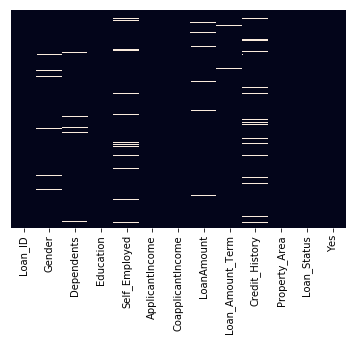

In [13]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [14]:
loan.drop(['Dependents'],axis=1,inplace=True)

In [15]:
loan.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Yes
0,LP001002,Male,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


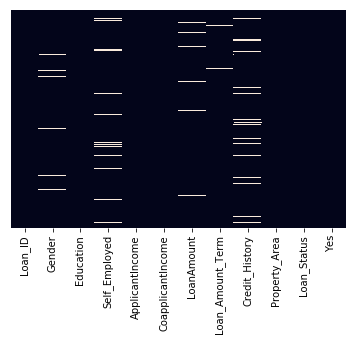

In [16]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [19]:
loan['Loan_Amount_Term'].isnull=360

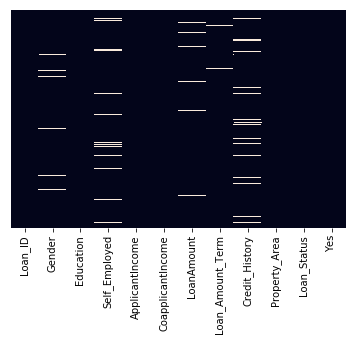

In [20]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [21]:
def fill(par):
    if par.isnull()==True:
        par=360.0
    

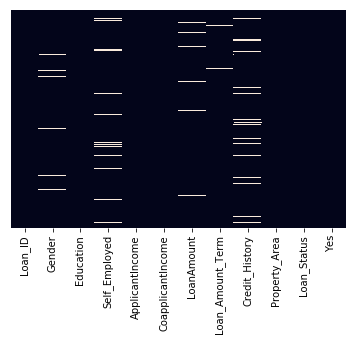

In [22]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [23]:
loan.drop(['Credit_History'],axis=1,inplace=True)

In [24]:
loan.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Yes
0,LP001002,Male,Graduate,No,5849,0.0,NaN,360.0,Urban,Y,0
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,1
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,1
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,1
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,0


In [25]:
status=pd.get_dummies(loan['Loan_Status'],drop_first=True)

In [26]:
loan.drop(['Loan_Status'],axis=1,inplace=True)
loan=pd.concat([loan,status],axis=1)

In [27]:
loan.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Yes,Y
0,LP001002,Male,Graduate,No,5849,0.0,NaN,360.0,Urban,0,1
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,Rural,1,0
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1,1
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1,1
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,Urban,0,1


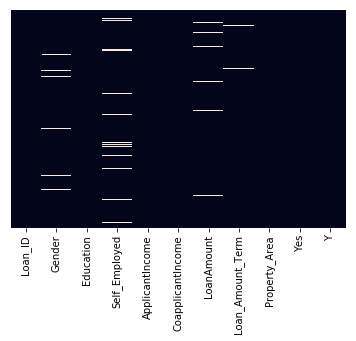

In [28]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [29]:
loan.dropna(inplace=True)

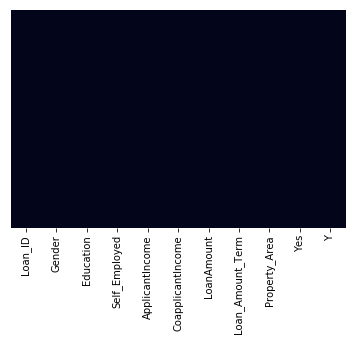

In [30]:
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [31]:
y=loan['Y']

In [32]:
X=loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lm = LogisticRegression()

In [37]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predictions = lm.predict( X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.68      1.00      0.81       110

avg / total       0.47      0.68      0.55       161



C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
pred = knn.predict(X_test)

In [45]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.27      0.25      0.26        51
          1       0.66      0.67      0.67       110

avg / total       0.54      0.54      0.54       161

